# Comparing Classifiers

**Overview**: In this application, the goal is to compare the performance of the classifiers, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  Dataset utilized is related to marketing bank products over the telephone.  



### Getting Started

Dataset used is from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time

In [3]:
# Load dataset
df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep=';')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Business Objective

The primary objective of this project is to enhance the efficiency of marketing campaigns by accurately predicting whether a client will subscribe to a term deposit. By leveraging machine learning models, the bank can target potential customers more effectively, reduce marketing costs, and increase the conversion rate of their telemarketing efforts.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
# Checking for missing values
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [11]:
# Drop duration as it should only be included for benchmark purposes
df = df.drop(columns=['duration'])

In [13]:
# Set seaborn style
sns.set(style="whitegrid")

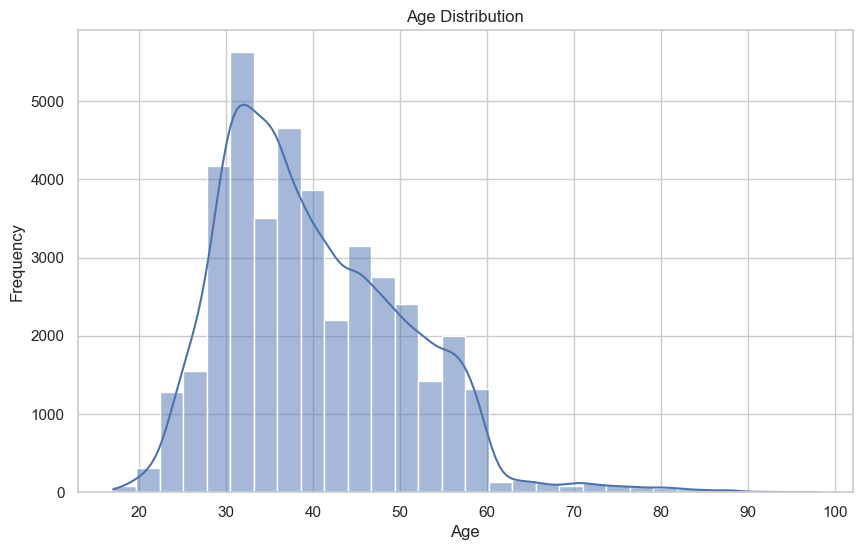

In [15]:
#Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

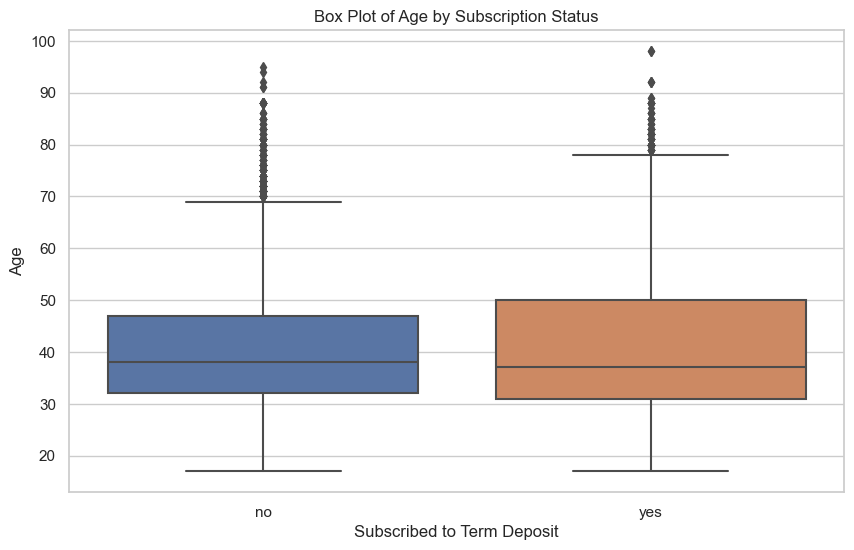

In [17]:
#Age by subscription status
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='age', data=df)
plt.title('Box Plot of Age by Subscription Status')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Age')
plt.show()

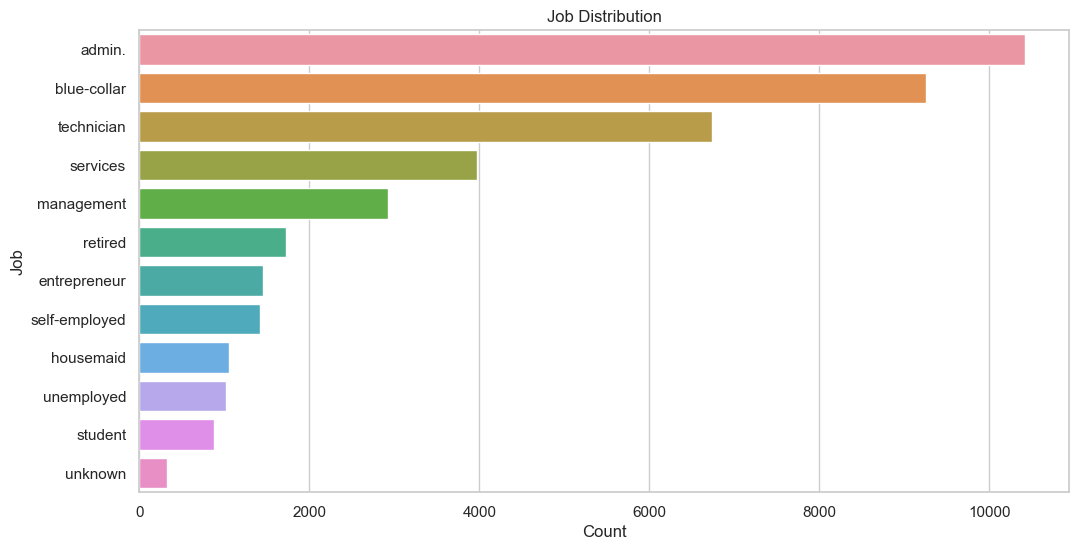

In [19]:
# Job Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='job', data=df, order=df['job'].value_counts().index)
plt.title('Job Distribution')
plt.xlabel('Count')
plt.ylabel('Job')
plt.show()


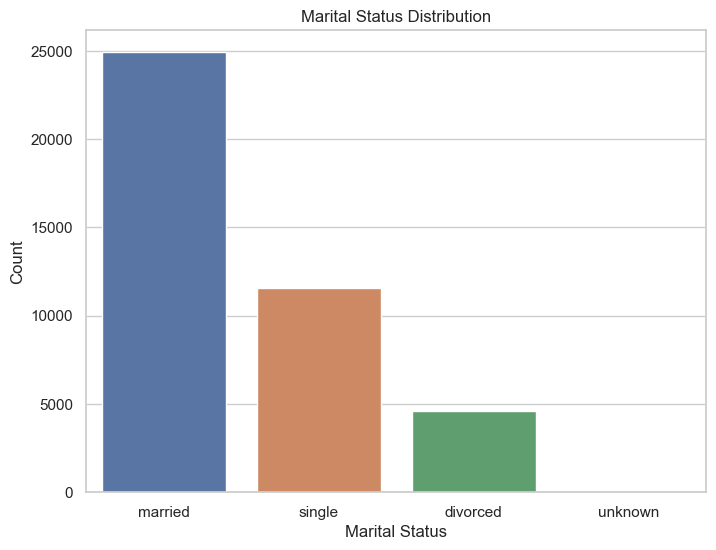

In [21]:
# Marital Status distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='marital', data=df, order=df['marital'].value_counts().index)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


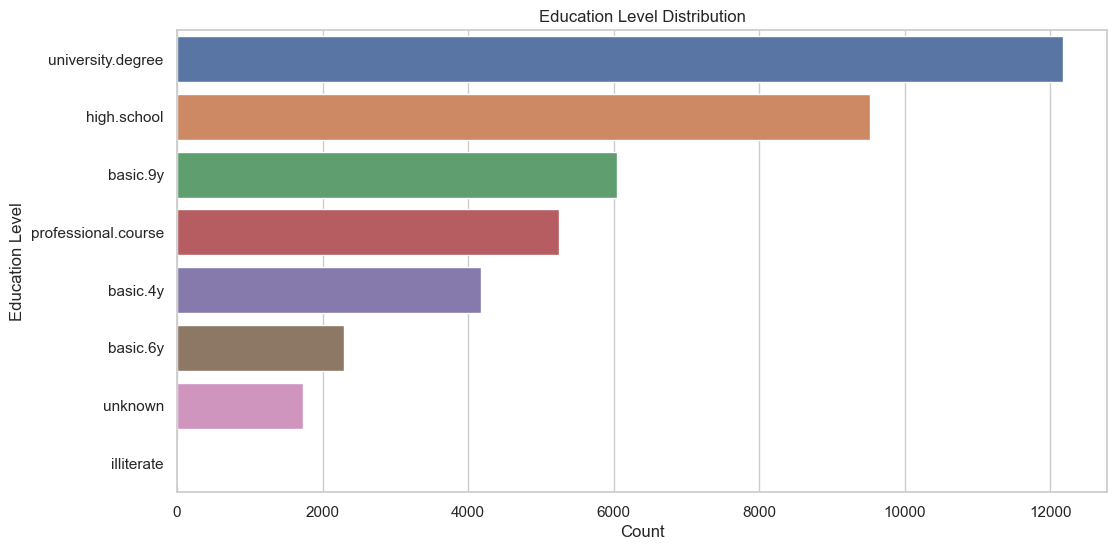

In [23]:
#Education Level distribution

plt.figure(figsize=(12, 6))
sns.countplot(y='education', data=df, order=df['education'].value_counts().index)
plt.title('Education Level Distribution')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()

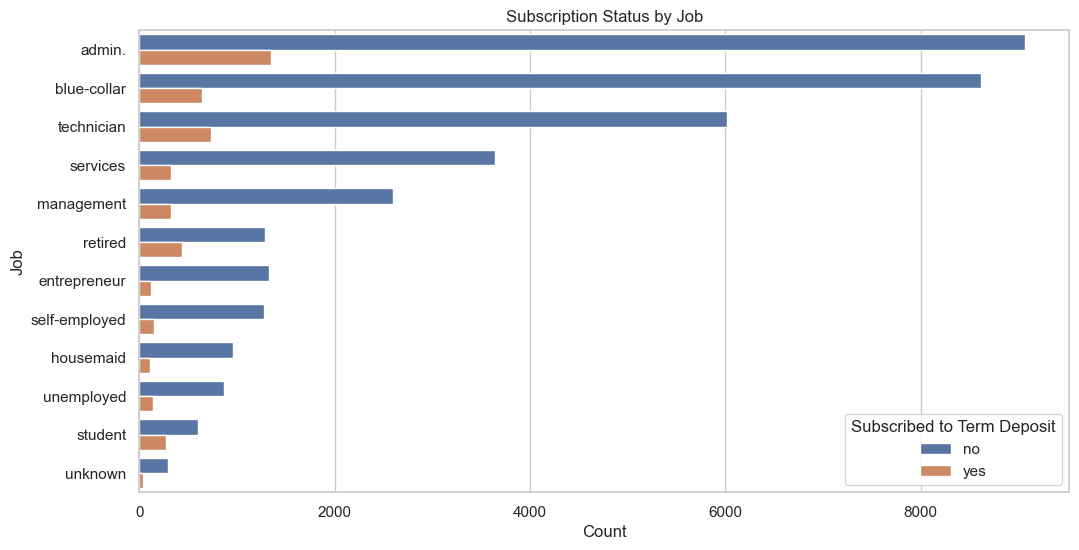

In [25]:
#Subscription Status by Job

plt.figure(figsize=(12, 6))
sns.countplot(y='job', hue='y', data=df, order=df['job'].value_counts().index)
plt.title('Subscription Status by Job')
plt.xlabel('Count')
plt.ylabel('Job')
plt.legend(title='Subscribed to Term Deposit')
plt.show()

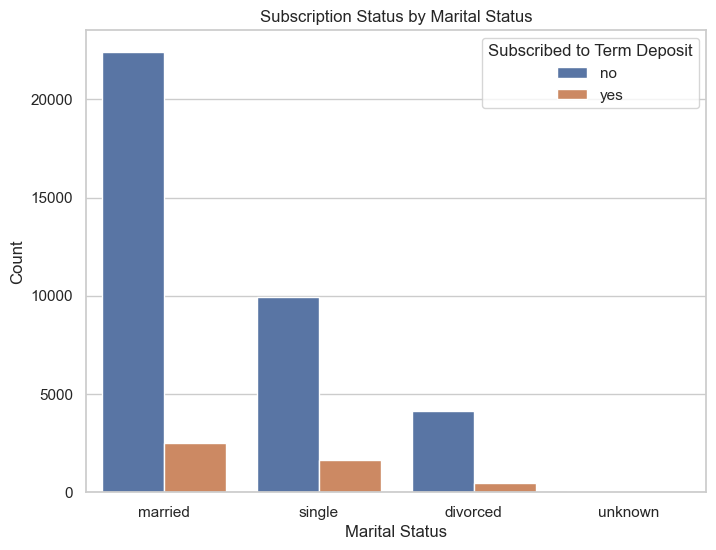

In [27]:
#Subscription Status by Marital Status

plt.figure(figsize=(8, 6))
sns.countplot(x='marital', hue='y', data=df, order=df['marital'].value_counts().index)
plt.title('Subscription Status by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Subscribed to Term Deposit')
plt.show()


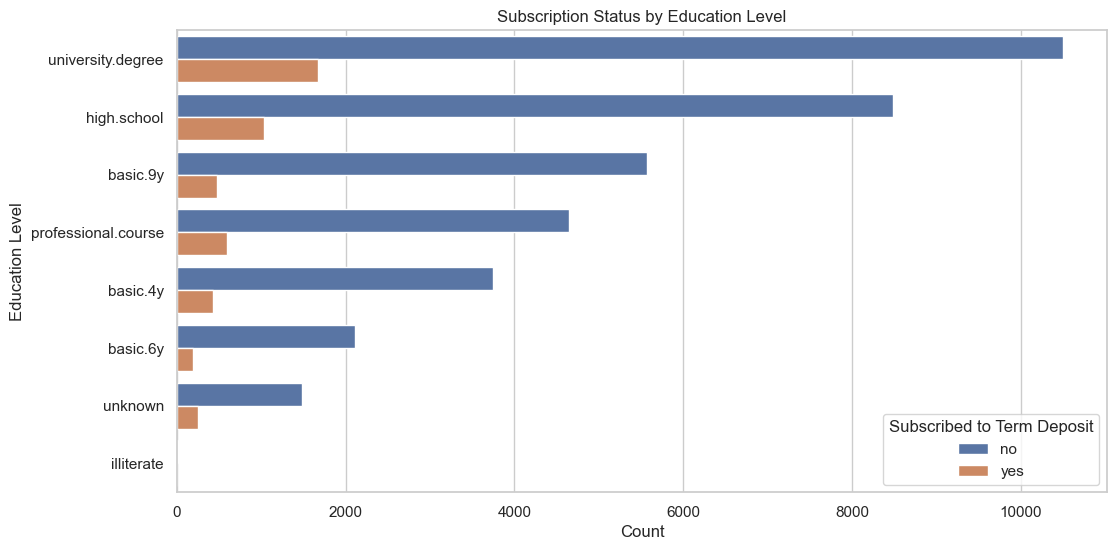

In [29]:
#Subscription Status by Education Level

plt.figure(figsize=(12, 6))
sns.countplot(y='education', hue='y', data=df, order=df['education'].value_counts().index)
plt.title('Subscription Status by Education Level')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.legend(title='Subscribed to Term Deposit')
plt.show()

### Problem 5: Engineering Features

We will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [32]:
# Split features and target
X = df.drop(columns=['y'])
y = df['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Encoding target

In [34]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [40]:
# Preprocessing pipelines for both numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [42]:
# Combine preprocessing with a placeholder model for later pipeline
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [46]:
# Baseline model using the most frequent class
baseline_accuracy = y_train.value_counts(normalize=True).max()
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")

Baseline Accuracy: 0.8876


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [48]:
# Logistic Regression model pipeline
lr_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Train the model
lr_model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('classifier', LogisticRegression(random_state=42))])

### Problem 9: Score the Model

What is the accuracy of your model?

In [50]:
# Predict and evaluate
y_pred_train = lr_model_pipeline.predict(X_train)
y_pred_test = lr_model_pipeline.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Logistic Regression Train Accuracy: {train_accuracy:.4f}")
print(f"Logistic Regression Test Accuracy: {test_accuracy:.4f}")

Logistic Regression Train Accuracy: 0.9013
Logistic Regression Test Accuracy: 0.8971


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [52]:
# Define the models to compare
models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

results = []

# Evaluate each model
for model_name, model in models.items():
    start_time = time.time()
    
    # Create a pipeline with preprocessing and the model
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # Predict and evaluate
    y_pred_train = model_pipeline.predict(X_train)
    y_pred_test = model_pipeline.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    results.append({
        'Model': model_name,
        'Train Time': train_time,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

results_df = pd.DataFrame(results)
results_df


,Model,Train Time,Train Accuracy,Test Accuracy
0,KNN,0.070105,0.914264,0.888080
1,Logistic Regression,0.169330,0.901275,0.897062
2,Decision Tree,0.276733,0.995357,0.836125
3,SVM,33.263747,0.904765,0.896941


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [54]:
from sklearn.model_selection import GridSearchCV

# Example: Hyperparameter tuning for Decision Tree
param_grid = {
    'classifier__max_depth': [5, 10, 15, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
]), param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Best Decision Tree Test Accuracy: {test_accuracy:.4f}")


Best parameters found:  {'classifier__max_depth': 5, 'classifier__min_samples_split': 2}
Best cross-validation score:  0.9012443095599393
Best Decision Tree Test Accuracy: 0.8967


##### Questions